In [8]:
# 0: ręczna konfiguracja ilości miast z pomocą kontrolki
import ipywidgets as widgets
wCities = widgets.IntSlider()
display(wCities)

IntSlider(value=0)

In [9]:
# 1: przygotowanie ustawień
import math
import numpy as np


### SETTINGS ###
# np.random.seed(1968003) # Fixing random state for reproducibility
np.random.seed(1) # Fixing random state for reproducibility
cities = wCities.value # how many cities
if cities == 0:
    cities = 10 # default 10
    print('WARNING: Set default 10 cities')
    
length = 100 # area where we have cities (map size)
roundCnt = 2 # round 

A = np.random.randint(length, size=(cities, 2)) #generate cities
print(A)

B = np.zeros((cities, cities)) #generate array for storage length of routes
# print(B)

[[37 12]
 [72  9]
 [75  5]
 [79 64]
 [16  1]
 [76 71]
 [ 6 25]
 [50 20]
 [18 84]
 [11 28]]


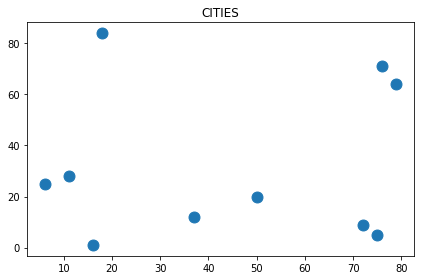

In [10]:
# 2: CHART
import matplotlib.pyplot as plt

plt.figure()
# Scatter plot on top of lines
plt.subplot(111)
plt.scatter(A[:,0], A[:,1], s=120, zorder=2)
plt.title('CITIES')
plt.tight_layout()
plt.savefig("test.png")

In [11]:
%%time
# 3: obliczanie odleglosci miedzy punktami:
# d^2 = (x2-x1)^2+(y2-y1)^2
for i in range(cities):
    for j in range(cities):
        B[i,j] = round(math.sqrt(math.pow((A[j,0]-A[i,0]),2)+math.pow((A[j,1]-A[i,1]),2)),roundCnt)

# show array with routes
print(B)

# show all routes
if False:
    for i in range(cities):
        for j in range(cities):
            print(i,"=[", A[i,0],A[i,1],"]", j,"=[", A[j,0],A[j,1],"]", end="\t")
            print("len: A", i, "- A", j, "  = ", B[i,j])

[[ 0.   35.13 38.64 66.84 23.71 70.72 33.62 15.26 74.46 30.53]
 [35.13  0.    5.   55.44 56.57 62.13 67.91 24.6  92.42 63.89]
 [38.64  5.    0.   59.14 59.14 66.01 71.84 29.15 97.42 68.01]
 [66.84 55.44 59.14  0.   89.1   7.62 82.76 52.7  64.2  76.94]
 [23.71 56.57 59.14 89.1   0.   92.2  26.   38.95 83.02 27.46]
 [70.72 62.13 66.01  7.62 92.2   0.   83.76 57.25 59.44 77.94]
 [33.62 67.91 71.84 82.76 26.   83.76  0.   44.28 60.21  5.83]
 [15.26 24.6  29.15 52.7  38.95 57.25 44.28  0.   71.55 39.81]
 [74.46 92.42 97.42 64.2  83.02 59.44 60.21 71.55  0.   56.44]
 [30.53 63.89 68.01 76.94 27.46 77.94  5.83 39.81 56.44  0.  ]]
CPU times: user 2.27 ms, sys: 0 ns, total: 2.27 ms
Wall time: 2.2 ms


In [12]:
%%time
#4 rozwiązanie problemu komiwojażera za pomocą metody najbliższego sąsiada
print("#1 Metoda najbliższego sąsiada:")
allPaths = list()
for firstCity in range(cities):
    visited = list()
    visited.append(firstCity)

    wholePath = 0
    #search shortest way
    while len(visited) < cities:
        nearCityPath = 9999
        nearCityName = 9999
        for neighbour in range(cities):
            if neighbour not in visited :
                if B[firstCity,neighbour] < nearCityPath :
                    nearCityPath = B[firstCity,neighbour]
                    nearCityName = neighbour
        if nearCityName != 9999:
            wholePath = wholePath+nearCityPath
            visited.append(nearCityName)
    print("visited:",visited,"wholePath:",wholePath)
    allPaths.append(wholePath)
print("all paths: ",allPaths)
print("min(allPaths): ", min(allPaths))
print("max(allPaths): ", max(allPaths))
print("avg(allPaths): ", sum(allPaths) / len(allPaths) )
print("shortest way is ",min(allPaths)/max(allPaths),"% longest way")

#1 Metoda najbliższego sąsiada:
visited: [0, 7, 4, 9, 6, 1, 2, 3, 5, 8] wholePath: 388.90999999999997
visited: [1, 2, 7, 0, 3, 4, 5, 9, 6, 8] wholePath: 463.09
visited: [2, 1, 7, 0, 3, 4, 5, 9, 6, 8] wholePath: 494.34999999999997
visited: [3, 5, 7, 1, 2, 8, 0, 9, 6, 4] wholePath: 554.7399999999999
visited: [4, 0, 6, 9, 7, 1, 2, 8, 3, 5] wholePath: 496.1499999999999
visited: [5, 3, 7, 8, 1, 2, 0, 9, 6, 4] wholePath: 577.0699999999999
visited: [6, 9, 4, 0, 7, 8, 1, 2, 3, 5] wholePath: 476.21
visited: [7, 0, 1, 2, 4, 9, 6, 3, 5, 8] wholePath: 373.55
visited: [8, 9, 5, 6, 3, 7, 0, 4, 1, 2] wholePath: 659.16
visited: [9, 6, 4, 0, 7, 8, 1, 2, 3, 5] wholePath: 446.84999999999997
all paths:  [388.90999999999997, 463.09, 494.34999999999997, 554.7399999999999, 496.1499999999999, 577.0699999999999, 476.21, 373.55, 659.16, 446.84999999999997]
min(allPaths):  373.55
max(allPaths):  659.16
avg(allPaths):  493.008
shortest way is  0.5667061108076947 % longest way
CPU times: user 0 ns, sys: 4.12 ms, t

min(allPaths):  373.55 index:  7
visited: [0, 7, 1, 2, 4, 9, 6, 3, 5, 8] wholePath: 373.55
visited: [9, 8, 5, 6, 3, 7, 0, 4, 1, 2] wholePath: 659.16
CPU times: user 108 ms, sys: 136 ms, total: 245 ms
Wall time: 141 ms


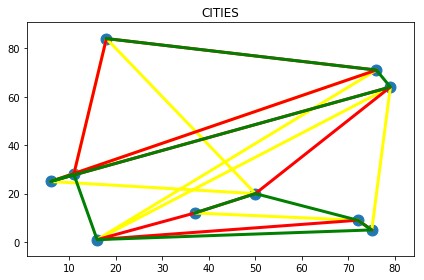

In [13]:
%%time
print("min(allPaths): ", min(allPaths), "index: ", allPaths.index(min(allPaths))) 
# 4 PRESENTATION
### exp
# SHORTEST:
firstCity = allPaths.index(min(allPaths))
if True:
    vis = cities * [-1]
    #vis = vis -1
    vis[0] = firstCity
    visited = list()
    visited.append(firstCity)

    wholePath = 0
    #search shortest way
    #while len(visited) < cities:
    for latest in range(cities):
        nearCityPath = 9999
        nearCityName = 9999
        for neighbour in range(cities):
            if neighbour not in vis :
            #if neighbour not in visited :
                if B[firstCity,neighbour] < nearCityPath :
                    nearCityPath = B[firstCity,neighbour]
                    nearCityName = neighbour
        if nearCityName != 9999:
            wholePath = wholePath+nearCityPath
            #visited.append(nearCityName)
            vis[latest] = nearCityName
            visited.append(nearCityName)
    print("visited:",vis,"wholePath:",wholePath)
    # print("visited:",visited,"wholePath:",wholePath)
    allPaths.append(wholePath)

A1 = np.zeros((cities, 2))
for i in range(cities):
    A1[i,0]=A[vis[i],0]
    A1[i,1]=A[vis[i],1]
   # LONGEST:
firstCity = allPaths.index(max(allPaths))
if True:
    vis = cities * [-1]
    #vis = vis -1
    vis[0] = firstCity
    visited = list()
    visited.append(firstCity)

    wholePath = 0
    #search shortest way
    #while len(visited) < cities:
    for latest in range(cities):
        nearCityPath = 9999
        nearCityName = 9999
        for neighbour in range(cities):
            if neighbour not in vis :
            #if neighbour not in visited :
                if B[firstCity,neighbour] < nearCityPath :
                    nearCityPath = B[firstCity,neighbour]
                    nearCityName = neighbour
        if nearCityName != 9999:
            wholePath = wholePath+nearCityPath
            #visited.append(nearCityName)
            vis[latest] = nearCityName
            visited.append(nearCityName)
    print("visited:",vis,"wholePath:",wholePath)
    # print("visited:",visited,"wholePath:",wholePath)
    allPaths.append(wholePath)

A2 = np.zeros((cities, 2))
for i in range(cities):
    A2[i,0]=A[vis[i],0]
    A2[i,1]=A[vis[i],1]
    
###exp
# write paths
plt.figure()
# Scatter plot on top of lines
plt.subplot(111)
plt.plot(A[:,0], A[:,1], 'C3', zorder=2, lw=3, color = 'yellow')
plt.plot(A1[:,0], A1[:,1], 'C3', zorder=3, lw=3, color='green')
plt.plot(A2[:,0], A2[:,1], 'C3', zorder=2, lw=3, color='red')
plt.scatter(A[:,0], A[:,1], s=120, zorder=2)
plt.title('CITIES')
plt.tight_layout()